In [13]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np

In [14]:
#Abrimos el fits
imagen = fits.open('NGC_2070_B_400.000secs.fit')[0]
#Extraemos la data y el header
data = imagen.data
header = imagen.header
header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
OBSERVER= 'Riffo, Cornejo,Liberona' / SBIGFITSEXT The name of the observer      
ORIGIN  = 'MAS500  '           / Description of location                        
TELESCOP= 'MAS500  '        

In [32]:
#Obtenemos el "umbral" que utilizaremos para detectar las fuentes
threshold = detect_threshold(data, nsigma=1)
#Utilizamos el umbral y la imagen para detectar fuentes
sour = detect_sources(data, threshold, npixels=10)
#Mostramos el número de fuentes detectadas
sour

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 15075
labels: [    1     2     3     4     5 ... 15071 15072 15073 15074 15075]

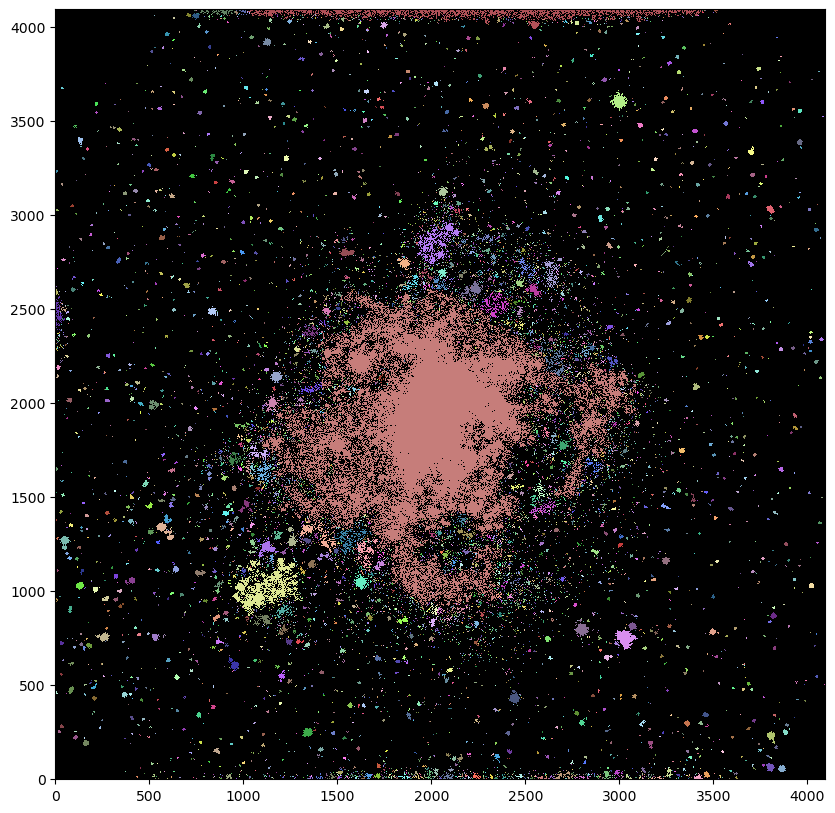

In [33]:
#Generamos un mapa de colores que asocia un color a cada fuente
cmap_sour = sour.make_cmap(seed=123)
#Mostramos las fuentes obtenidas
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour, origin='lower', cmap=cmap_sour, interpolation='nearest')
plt.show()


In [34]:
#Usamos la función mencionada para separar las fuentes
sour_deblend = deblend_sources(data, sour, npixels=10, nlevels=1 ,contrast=1)
#Mostramos el número de fuentes detectadas
sour_deblend 

Deblending:   0%|          | 0/6004 [00:00<?, ?it/s]

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 15075
labels: [    1     2     3     4     5 ... 15071 15072 15073 15074 15075]

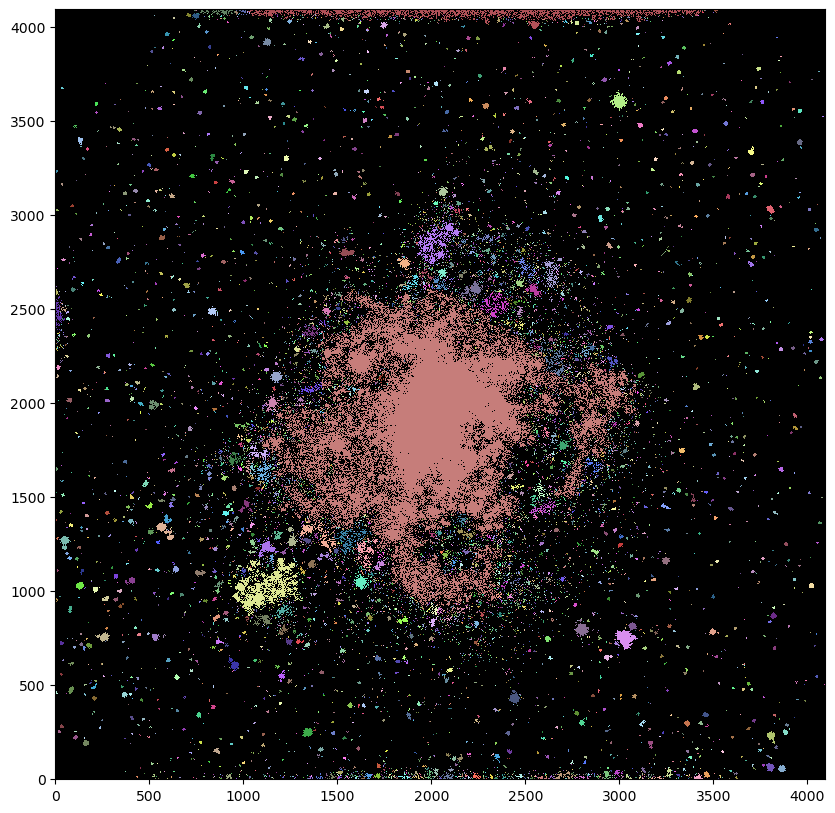

In [35]:
cmap_deblend = sour_deblend.make_cmap(seed=123)
#Y mostramos las fuentes
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(sour_deblend, origin='lower', cmap=cmap_deblend,interpolation='nearest')
plt.show()

In [36]:
#Obtenemos el catálogo
cat = SourceCatalog(data, sour_deblend)
#Lo pasamos a tabla y lo mostramos
tbl = cat.to_table()
tbl

label,xcentroid,ycentroid,sky_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,area,semimajor_sigma,semiminor_sigma,orientation,eccentricity,min_value,max_value,local_background,segment_flux,segment_fluxerr,kron_flux,kron_fluxerr
,,,,,,,,pix2,pix,pix,deg,,,,,,,,
int32,float64,float64,object,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,436.2998310810811,8.40308277027027,None,429,443,0,15,97.0,3.758886294279217,3.410292812200147,-60.38196780991923,0.4205669664413549,226.0,782.0,0.0,23680.0,nan,484695.4097330079,nan
2,533.6766269941758,3.5484932894403647,None,529,537,0,7,17.0,2.4091285132339078,1.8536211740595923,-34.339283859719046,0.6387484339958193,226.0,253.0,0.0,3949.0,nan,130154.8512395248,nan
3,548.4509090909091,2.561118881118881,None,546,551,0,5,15.0,1.676091681879885,1.581567088596522,-88.46264383894469,0.3310757973084863,226.0,254.0,0.0,3575.0,nan,92769.411522243,nan
4,598.9044895868897,1.944264254011608,None,591,606,0,6,47.0,3.9916929180023275,1.5280613534775722,2.879542183264985,0.9238269522836192,226.0,564.0,0.0,11716.0,nan,200552.8260536294,nan
5,745.8157294832827,1.0991641337386018,None,743,749,0,3,11.0,2.0264071984608623,0.8853108464162177,-5.7645343538102924,0.8995164250566303,227.0,255.0,0.0,2632.0,nan,60923.27855421758,nan
6,750.5906015037594,3.3398496240601503,None,748,754,0,7,11.0,2.480608480865455,1.168806334645674,-46.70087667854031,0.88203853612665,226.0,272.0,0.0,2660.0,nan,103342.87646262252,nan
7,782.2305066946706,3.3457600420057756,None,780,785,0,7,16.0,2.1598827452500617,1.3560157485148068,-62.12236084033377,0.7783592456602073,226.0,274.0,0.0,3809.0,nan,107837.1243003103,nan
8,836.1216216216217,2.369369369369369,None,832,840,0,4,13.0,2.353318353781974,1.1963121128594314,-5.739543622168324,0.8611498702601101,226.0,683.0,0.0,3552.0,nan,106693.74692939667,nan


In [37]:
tabla = tbl['label', 'xcentroid', 'ycentroid', 'area', 'segment_flux']
tabla

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,436.2998310810811,8.40308277027027,97.0,23680.0
2,533.6766269941758,3.5484932894403647,17.0,3949.0
3,548.4509090909091,2.561118881118881,15.0,3575.0
4,598.9044895868897,1.944264254011608,47.0,11716.0
5,745.8157294832827,1.0991641337386018,11.0,2632.0
6,750.5906015037594,3.3398496240601503,11.0,2660.0
7,782.2305066946706,3.3457600420057756,16.0,3809.0
8,836.1216216216217,2.369369369369369,13.0,3552.0


In [38]:
#Dividimos el "flujo" por el tiempo de exposición (para obtener de verdad el flujo xd)
tabla['segment_flux'] = tabla['segment_flux']/header['EXPTIME']
tabla

label,xcentroid,ycentroid,area,segment_flux
,,,pix2,
int32,float64,float64,float64,float64
1,436.2998310810811,8.40308277027027,97.0,59.2
2,533.6766269941758,3.5484932894403647,17.0,9.8725
3,548.4509090909091,2.561118881118881,15.0,8.9375
4,598.9044895868897,1.944264254011608,47.0,29.29
5,745.8157294832827,1.0991641337386018,11.0,6.58
6,750.5906015037594,3.3398496240601503,11.0,6.65
7,782.2305066946706,3.3457600420057756,16.0,9.5225
8,836.1216216216217,2.369369369369369,13.0,8.88


In [39]:
#Calculamos las magnitudes aparentes usando el zeropoint
zeropoint = 38.09299288251983
tabla['magnitude'] = zeropoint - 2.5*np.log(tabla['segment_flux'])
tabla

label,xcentroid,ycentroid,area,segment_flux,magnitude
,,,pix2,,
int32,float64,float64,float64,float64,float64
1,436.2998310810811,8.40308277027027,97.0,59.2,27.890689027794927
2,533.6766269941758,3.5484932894403647,17.0,9.8725,32.36861009707316
3,548.4509090909091,2.561118881118881,15.0,8.9375,32.617353112469516
4,598.9044895868897,1.944264254011608,47.0,29.29,29.649877480420727
5,745.8157294832827,1.0991641337386018,11.0,6.58,33.382906019176765
6,750.5906015037594,3.3398496240601503,11.0,6.65,33.356450745850424
7,782.2305066946706,3.3457600420057756,16.0,9.5225,32.45884933409327
8,836.1216216216217,2.369369369369369,13.0,8.88,32.63348899000963


In [40]:
#Mostramos las magnitudes
np.sort(tabla['magnitude'])

4.189502948476395
11.581671644481894
12.63563868101934
13.787938558775874
14.87428047981691
15.216509001823045
15.53614035239643
16.53739648897076
16.95708119738197
16.961336206903162
17.120057864545597
